## Import Basic Libraries

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

## Import dataset

In [4]:
train = pd.read_csv("Train.csv")
test = pd.read_csv("Test.csv")

## Data wrangling
### Handling missing values

In [5]:
train.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


In [6]:
test.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type
0,FDW58,20.750,Low Fat,0.007565,Snack Foods,107.8622,OUT049,1999,Medium,Tier 1,Supermarket Type1
1,FDW14,8.300,reg,0.038428,Dairy,87.3198,OUT017,2007,NaN,Tier 2,Supermarket Type1
2,NCN55,14.600,Low Fat,0.099575,Others,241.7538,OUT010,1998,NaN,Tier 3,Grocery Store
3,FDQ58,7.315,Low Fat,0.015388,Snack Foods,155.0340,OUT017,2007,NaN,Tier 2,Supermarket Type1
4,FDY38,NaN,Regular,0.118599,Dairy,234.2300,OUT027,1985,Medium,Tier 3,Supermarket Type3


In [7]:
print(train.shape)
print(test.shape)

(8523, 12)
(5681, 11)


In [8]:
train.isna().sum()   #no.of missing values in training set

Item_Identifier                 0
Item_Weight                  1463
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  2410
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales               0
dtype: int64

In [9]:
test.isna().sum()   #no.of missing values in test set

Item_Identifier                 0
Item_Weight                   976
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  1606
Outlet_Location_Type            0
Outlet_Type                     0
dtype: int64

In [10]:
#lets remove missing values in both train and test datasets

re_map = {"Small":1,"Medium":2,"High":3}
train["Outlet_Size"] = train["Outlet_Size"].map(re_map)
train["Item_Weight"] = train["Item_Weight"].fillna(train["Item_Weight"].mean())
train["Outlet_Size"] = train["Outlet_Size"].fillna(train["Outlet_Size"].median())

In [11]:
train.isna().sum()

Item_Identifier              0
Item_Weight                  0
Item_Fat_Content             0
Item_Visibility              0
Item_Type                    0
Item_MRP                     0
Outlet_Identifier            0
Outlet_Establishment_Year    0
Outlet_Size                  0
Outlet_Location_Type         0
Outlet_Type                  0
Item_Outlet_Sales            0
dtype: int64

In [12]:
test["Outlet_Size"] = test["Outlet_Size"].map(re_map)
test["Item_Weight"] = test["Item_Weight"].fillna(test["Item_Weight"].mean())
test["Outlet_Size"] = test["Outlet_Size"].fillna(test["Outlet_Size"].median())

In [13]:
test.isna().sum()

Item_Identifier              0
Item_Weight                  0
Item_Fat_Content             0
Item_Visibility              0
Item_Type                    0
Item_MRP                     0
Outlet_Identifier            0
Outlet_Establishment_Year    0
Outlet_Size                  0
Outlet_Location_Type         0
Outlet_Type                  0
dtype: int64

## Exploratory Data Analysis (EDA)

/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2551: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).



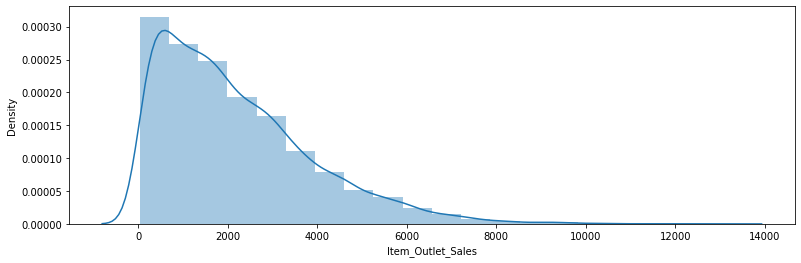

In [14]:
#Let us explore the Item_Outlet_Sales from training dataset

plt.figure(figsize = (13,4))
sns.distplot(train["Item_Outlet_Sales"], bins = 20)

In [15]:
#Let us explore the percentage items in out Item_Type

fig = px.pie(train["Item_Type"],names = "Item_Type",title="Item Types in Big mart dataset")
fig.show()

/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning:

Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



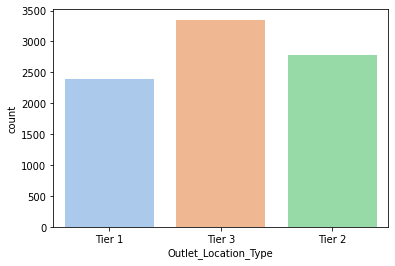

In [16]:
#Let's explore outlet location type

sns.countplot(train["Outlet_Location_Type"], palette="pastel")

In [17]:
train["Outlet_Type"].unique()

array(['Supermarket Type1', 'Supermarket Type2', 'Grocery Store',
       'Supermarket Type3'], dtype=object)

/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning:

Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



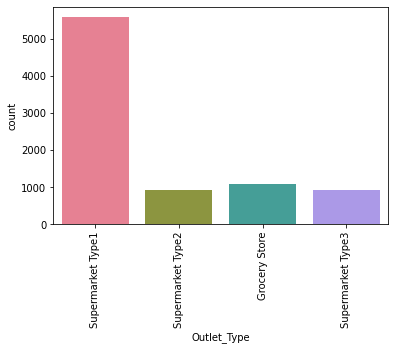

In [18]:
sns.countplot(train["Outlet_Type"],palette ="husl")
plt.xticks(rotation = 90)
plt.show()

## Correlation matrix for feature selection 

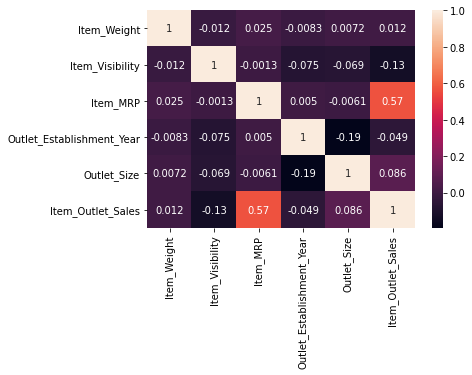

In [19]:
corr = train.corr()
sns.heatmap(corr, annot = True)

In [20]:
train.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,2.0,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,2.0,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,2.0,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,2.0,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,3.0,Tier 3,Supermarket Type1,994.7052


In [21]:
Fat_Contents = {'Low Fat':'Low Fat', 'low fat':'Low Fat', 'LF':'Low Fat',
               'Regular':'Regular', 'reg':'Regular'}


In [22]:
train["Item_Fat_Content"].unique()

array(['Low Fat', 'Regular', 'low fat', 'LF', 'reg'], dtype=object)

In [23]:
train['Item_Fat_Content'] = train['Item_Fat_Content'].map(Fat_Contents)


In [24]:
train["Item_Fat_Content"].unique()

array(['Low Fat', 'Regular'], dtype=object)

In [25]:
test["Item_Fat_Content"].unique()

array(['Low Fat', 'reg', 'Regular', 'LF', 'low fat'], dtype=object)

In [26]:
test["Item_Fat_Content"] = test["Item_Fat_Content"].map(Fat_Contents)

In [27]:
test["Item_Fat_Content"].unique()

array(['Low Fat', 'Regular'], dtype=object)

In [28]:
# Let's get dummy variabls for categorical variables

dummy_features = ['Outlet_Size','Outlet_Type','Outlet_Location_Type','Item_Fat_Content',"Item_Type"]
X = pd.get_dummies(train[dummy_features])
train = pd.concat([train,X],axis=1)

In [29]:
train.drop(labels = ["Outlet_Size",'Outlet_Location_Type',"Outlet_Type",'Item_Fat_Content',
                     'Outlet_Identifier','Item_Identifier',"Item_Type","Outlet_Establishment_Year"],
           axis=1,inplace = True)

In [30]:
train.head()

,Item_Weight,Item_Visibility,Item_MRP,Item_Outlet_Sales,Outlet_Type_Grocery Store,Outlet_Type_Supermarket Type1,Outlet_Type_Supermarket Type2,Outlet_Type_Supermarket Type3,Outlet_Location_Type_Tier 1,Outlet_Location_Type_Tier 2,Outlet_Location_Type_Tier 3,Item_Fat_Content_Low Fat,Item_Fat_Content_Regular,Item_Type_Baking Goods,Item_Type_Breads,Item_Type_Breakfast,Item_Type_Canned,Item_Type_Dairy,Item_Type_Frozen Foods,Item_Type_Fruits and Vegetables,Item_Type_Hard Drinks,Item_Type_Health and Hygiene,Item_Type_Household,Item_Type_Meat,Item_Type_Others,Item_Type_Seafood,Item_Type_Snack Foods,Item_Type_Soft Drinks,Item_Type_Starchy Foods
0,9.30,0.016047,249.8092,3735.1380,0,1,0,0,1,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0
1,5.92,0.019278,48.2692,443.4228,0,0,1,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0
2,17.50,0.016760,141.6180,2097.2700,0,1,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0
3,19.20,0.000000,182.0950,732.3800,1,0,0,0,0,0,1,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0
4,8.93,0.000000,53.8614,994.7052,0,1,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0


In [31]:
dummy_features = ['Outlet_Size','Outlet_Type','Outlet_Location_Type','Item_Fat_Content',"Item_Type"]
y = pd.get_dummies(test[dummy_features])
test = pd.concat([test,y],axis=1)

In [32]:
test.drop(labels = ["Outlet_Size",'Outlet_Location_Type',"Outlet_Type",'Item_Fat_Content',
                     'Outlet_Identifier','Item_Identifier',"Item_Type","Outlet_Establishment_Year"],
           axis=1,inplace = True)

In [33]:
test.head()

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Type_Grocery Store,Outlet_Type_Supermarket Type1,Outlet_Type_Supermarket Type2,Outlet_Type_Supermarket Type3,Outlet_Location_Type_Tier 1,Outlet_Location_Type_Tier 2,Outlet_Location_Type_Tier 3,Item_Fat_Content_Low Fat,Item_Fat_Content_Regular,Item_Type_Baking Goods,Item_Type_Breads,Item_Type_Breakfast,Item_Type_Canned,Item_Type_Dairy,Item_Type_Frozen Foods,Item_Type_Fruits and Vegetables,Item_Type_Hard Drinks,Item_Type_Health and Hygiene,Item_Type_Household,Item_Type_Meat,Item_Type_Others,Item_Type_Seafood,Item_Type_Snack Foods,Item_Type_Soft Drinks,Item_Type_Starchy Foods
0,20.750000,0.007565,107.8622,0,1,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
1,8.300000,0.038428,87.3198,0,1,0,0,0,1,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0
2,14.600000,0.099575,241.7538,1,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0
3,7.315000,0.015388,155.0340,0,1,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
4,12.695633,0.118599,234.2300,0,0,0,1,0,0,1,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0


In [34]:
X1 = train.drop(labels=["Item_Outlet_Sales"],axis=1)
Y1 = train["Item_Outlet_Sales"]
print(X1.shape)
print(Y1.shape)

(8523, 28)
(8523,)


## Data Preprocessing
#### Feature scaling

In [35]:
from sklearn.preprocessing import MinMaxScaler

fs = MinMaxScaler()
                    
x = X1.values       #train dataset values needed to be scaled down
y = test.values     #test dataset values needed to be scaled down

x = fs.fit_transform(x)
y = fs.fit_transform(y)


## Splitting the dataset

In [36]:
from sklearn.model_selection import train_test_split

x_train,x_test,y_train,y_test = train_test_split(x, Y1, test_size = 0.25, random_state=0)

## Training our model

In [37]:
# We will use four different algorithms for training our model:-
# 1.Linear Regression
# 2.Lasso Regression
# 3. Decision Tress Regression
# 4.XGBoost

In [38]:
# 1. Linear Regression

from sklearn.linear_model import LinearRegression
lr = LinearRegression()
lr.fit(x_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [39]:
y_pred_1 = lr.predict(x_test)

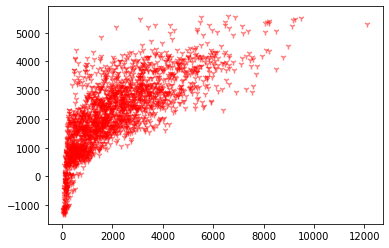

In [45]:
plt.scatter(y_test,y_pred_1,alpha=0.5,marker="1",c="r")

In [53]:
#Let's evaluate model performance 

from sklearn.metrics import mean_squared_error,mean_absolute_error
print("MSE:",mean_squared_error(y_test,y_pred_1))
print("MAE:",mean_absolute_error(y_test,y_pred_1))
print('RMSE:', np.sqrt(mean_squared_error(y_test, y_pred_1)))


MSE: 1319378.1819277012
MAE: 860.6151734396996
RMSE: 1148.6418858494153


### <b>📌NOTE:- I have used Linear Regression Model only till this point.<b/>

#### Now, It's your turn to train the same model with rest of the regression algorithms which are as follows:-
#### 1. Lasso Regression
#### 2. Decision Trees Regression
#### 3. XGBoost (for regression)


### 📉📊 <b>Twick around with EDA part</b> of this Notebook and try to use other seaborn and matplotlib plots to see great Visualization results.